In [1]:
import os
import psycopg2
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [2]:
# Database connection parameters
db_params = {
    'dbname': 'movie_db', 
    'user': 'postgres', 
    'password': os.environ['POSTGRES_PASSWORD'], 
    'host': '49.13.1.33',
    'port': '5333'
}

# Connection
conn = psycopg2.connect(**db_params)

# Helper function to query the database
def query_db(sql_query, conn):
    return pd.read_sql_query(sql_query, conn)

# Queries
movie_lengths_stats = query_db("SELECT MIN(runtime) as min_runtime, MAX(runtime) as max_runtime, AVG(runtime) as avg_runtime FROM Movies", conn)


movies_per_genre = query_db("SELECT Genres.name, COUNT(MovieGenres.genre_id) as num_movies FROM MovieGenres JOIN Genres ON MovieGenres.genre_id = Genres.id GROUP BY Genres.name", conn)


movie_stats = query_db("""
SELECT
    AVG(runtime) as avg_runtime,
    AVG(budget) as avg_budget,
    AVG(revenue) as avg_revenue,
    MIN(release_date) as earliest_release,
    MAX(release_date) as latest_release
FROM Movies
""", conn)

KeyError: 'POSTGRES_PASSWORD'

C:\Users\mario\AppData\Local\Temp\ipykernel_21028\3193265748.py:15: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  return pd.read_sql_query(sql_query, conn)
C:\Users\mario\AppData\Local\Temp\ipykernel_21028\2463730215.py:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20', len(top_genre_per_country['country']))  # Colormap for different countries
C:\Users\mario\AppData\Local\Temp\ipykernel_21028\2463730215.py:30: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


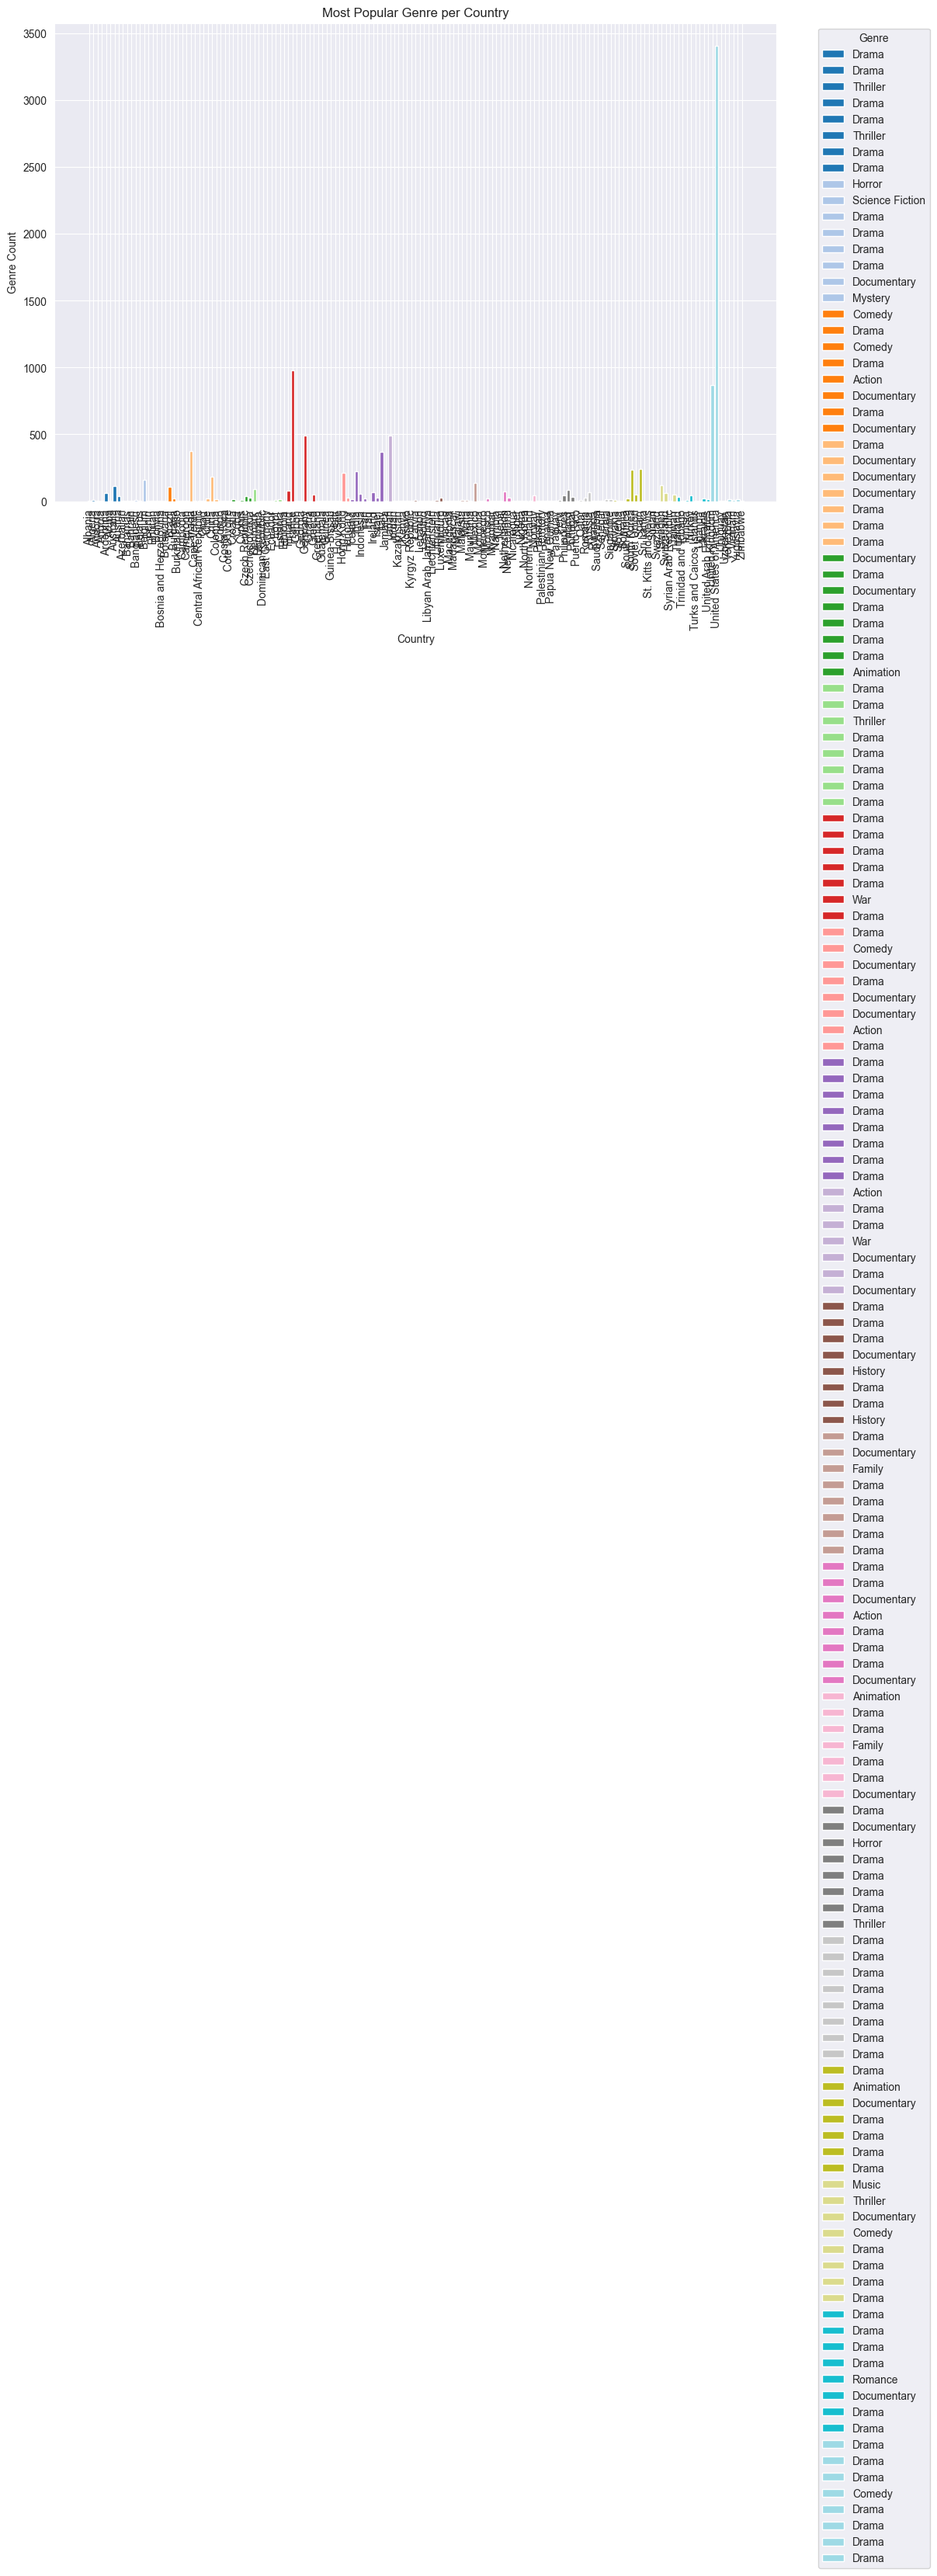

In [5]:
popular_genre_countries =query_db( """
SELECT pc.name AS country, g.name AS genre, COUNT(*) AS genre_count
FROM genres g
JOIN moviegenres mg ON g.id = mg.genre_id
JOIN movieproductioncountries mpc ON mg.movie_id = mpc.movie_id
JOIN productioncountries pc ON mpc.iso_3166_1 = pc.iso_3166_1
GROUP BY pc.name, g.name
ORDER BY pc.name, genre_count DESC;


 """, conn)
top_genre_per_country = popular_genre_countries.groupby('country').apply(lambda x: x.nlargest(1, 'genre_count')).reset_index(drop=True)

# Plotting
plt.figure(figsize=(12, 8))

colors = plt.cm.get_cmap('tab20', len(top_genre_per_country['country']))  # Colormap for different countries

for i, row in top_genre_per_country.iterrows():
    country = row['country']
    genre = row['genre']
    count = row['genre_count']
    plt.bar(country, count, color=colors(i), label=genre)

plt.title('Most Popular Genre per Country')
plt.xlabel('Country')
plt.ylabel('Genre Count')
plt.xticks(rotation=90)
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()